<a href="https://colab.research.google.com/github/gh-ita/SafetyScan/blob/main/image_similarity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faiss-gpu-cu11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 37.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
import os
import matplotlib.pyplot as plt
import faiss
from sklearn.decomposition import PCA

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
model = model.to(device)

In [ ]:
train_img = "/content/drive/MyDrive/Construction-Site-Safety-5/train/images"
train_img_list = os.listdir(train_img)

In [ ]:
img_embeddings = []
for image_path in train_img_list:
    if image_path != '.ipynb_checkpoints':
        img = Image.open(os.path.join(train_img, image_path))
        image_embedding = model.encode(img)
        img_embeddings.append(image_embedding)

In [ ]:
with open ('/content/drive/MyDrive/img_embeddings.txt', 'w') as f:
    for emb in img_embeddings:
        f.write(str(emb))
        f.write('\n')


In [ ]:
init_length = len(img_embeddings[0])
same_length = 1
for emb in img_embeddings:
    if len(emb) != init_length:
        same_length = 0
print(same_length)

1


In [ ]:
len(img_embeddings)

738

# **Clustering**

First iteration : 20 centroids

In [ ]:
niter = 20
verbose = True
img_array = np.array(img_embeddings)
d = img_array.shape[1]
obj_vals = {}

In [ ]:
f_iter_ncentroids = 7
f_iter_kmeans = faiss.Kmeans(d, f_iter_ncentroids, niter=niter, verbose=verbose)
f_obj_val = f_iter_kmeans.train(img_embeddings)
obj_vals[f_iter_ncentroids] = f_obj_val

In [ ]:
f_iter_kmeans.obj

array([52537.30078125, 29763.33789062, 28725.53515625, 27697.16796875,
       27428.8671875 , 27331.41210938, 27327.28125   , 27324.08398438,
       27322.4453125 , 27321.421875  , 27321.421875  , 27321.421875  ,
       27321.421875  , 27321.421875  , 27321.421875  , 27321.421875  ,
       27321.421875  , 27321.421875  , 27321.421875  , 27321.421875  ])

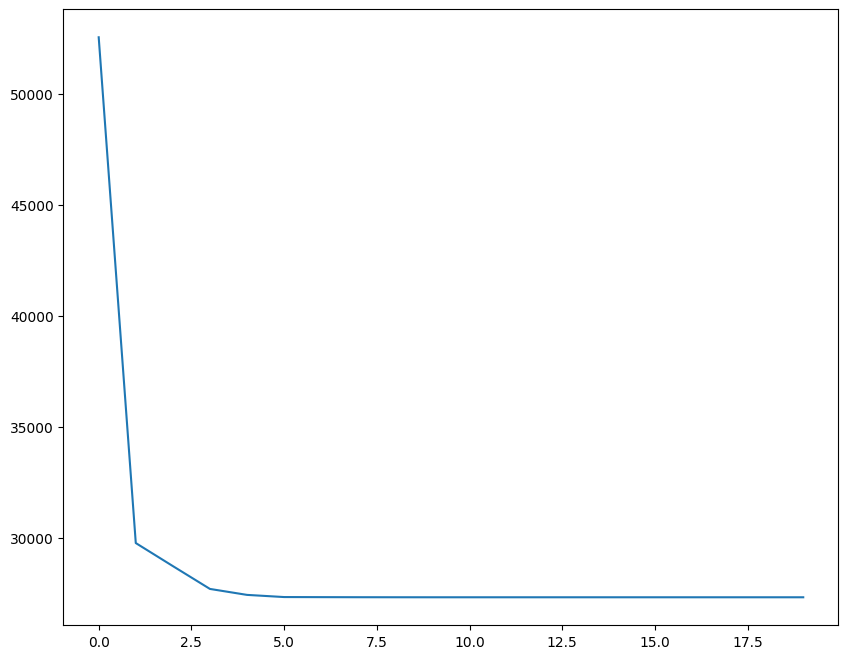

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(f_iter_kmeans.obj)
plt.show()

Second iteration : 14

In [ ]:
s_iter_ncentroids = 14
s_iter_kmeans = faiss.Kmeans(d, s_iter_ncentroids, niter=niter, verbose=verbose)
s_obj_val = s_iter_kmeans.train(img_embeddings)
obj_vals[s_iter_ncentroids] = s_obj_val

In [ ]:
s_iter_kmeans.obj

array([40645.796875  , 25326.43554688, 24200.29296875, 23802.68164062,
       23611.10546875, 23520.28125   , 23365.88671875, 23125.26953125,
       22950.453125  , 22939.83789062, 22934.61328125, 22918.44140625,
       22906.87695312, 22889.7578125 , 22872.91601562, 22864.06445312,
       22864.06445312, 22864.06445312, 22864.06445312, 22864.06445312])

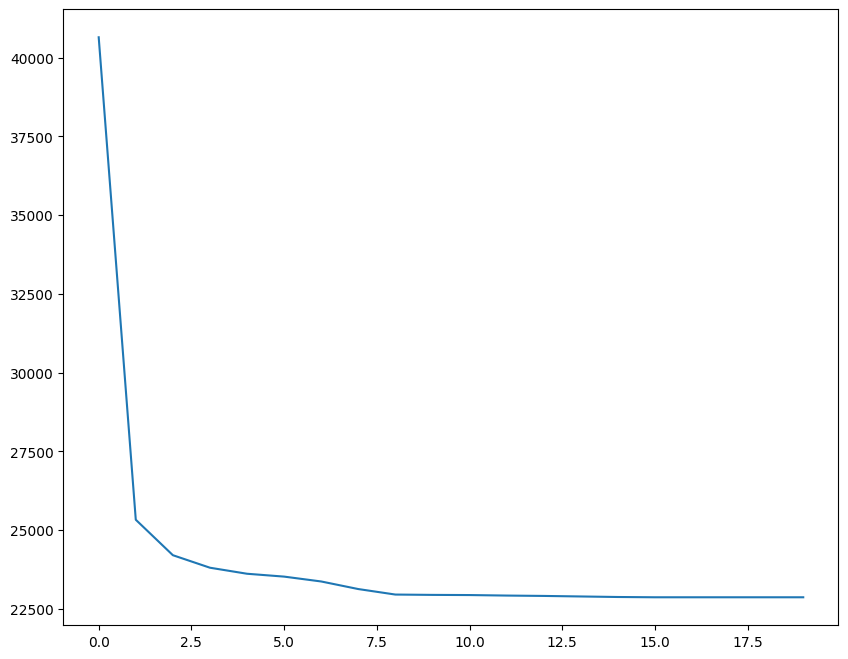

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(s_iter_kmeans.obj)
plt.show()

Third iteration: 28

In [ ]:
t_iter_ncentroids = 28
t_iter_kmeans = faiss.Kmeans(d, t_iter_ncentroids, niter=niter, verbose=verbose)
t_obj_val = t_iter_kmeans.train(img_embeddings)
obj_vals[t_iter_ncentroids] = t_obj_val

In [ ]:
t_iter_kmeans.obj

array([35976.71875   , 21897.98828125, 20863.93554688, 20360.1015625 ,
       20031.43359375, 19895.09179688, 19816.24609375, 19765.89257812,
       19733.41210938, 19718.59179688, 19713.41992188, 19709.99804688,
       19709.99804688, 19709.99804688, 19709.99804688, 19709.99804688,
       19709.99804688, 19709.99804688, 19709.99804688, 19709.99804688])

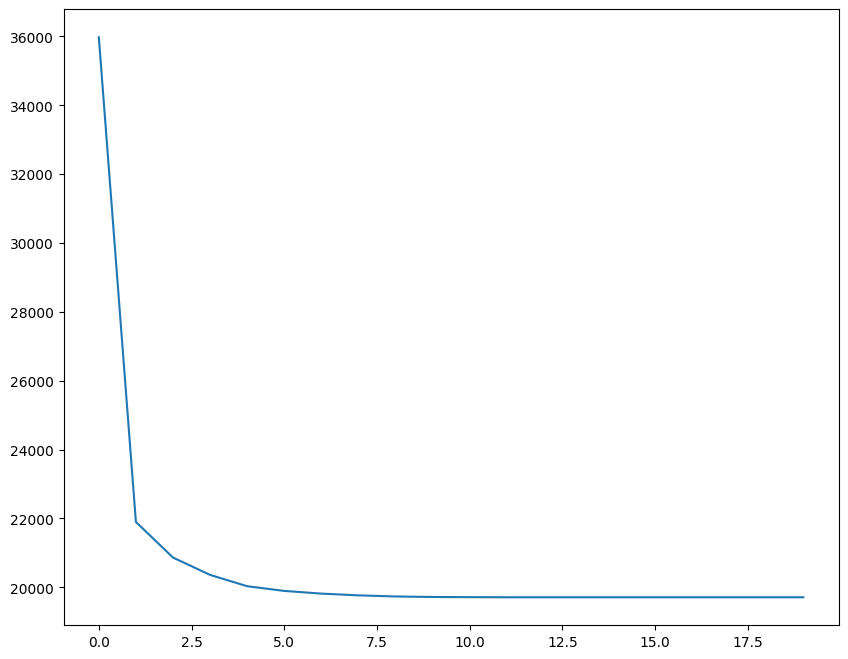

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(t_iter_kmeans.obj)
plt.show()

Fourth iteration : 56

In [ ]:
fo_iter_ncentroids = 56
fo_iter_kmeans = faiss.Kmeans(d, fo_iter_ncentroids, niter=niter, verbose=verbose)
fo_obj_val = fo_iter_kmeans.train(img_embeddings)
obj_vals[fo_iter_ncentroids] = fo_obj_val

In [ ]:
fo_iter_kmeans.obj

array([30789.78125   , 18643.40625   , 17647.47070312, 17097.41796875,
       16859.0078125 , 16767.75976562, 16714.23046875, 16681.54101562,
       16666.12890625, 16660.29492188, 16656.0546875 , 16656.0546875 ,
       16656.0546875 , 16656.0546875 , 16656.0546875 , 16656.0546875 ,
       16656.0546875 , 16656.0546875 , 16656.0546875 , 16656.0546875 ])

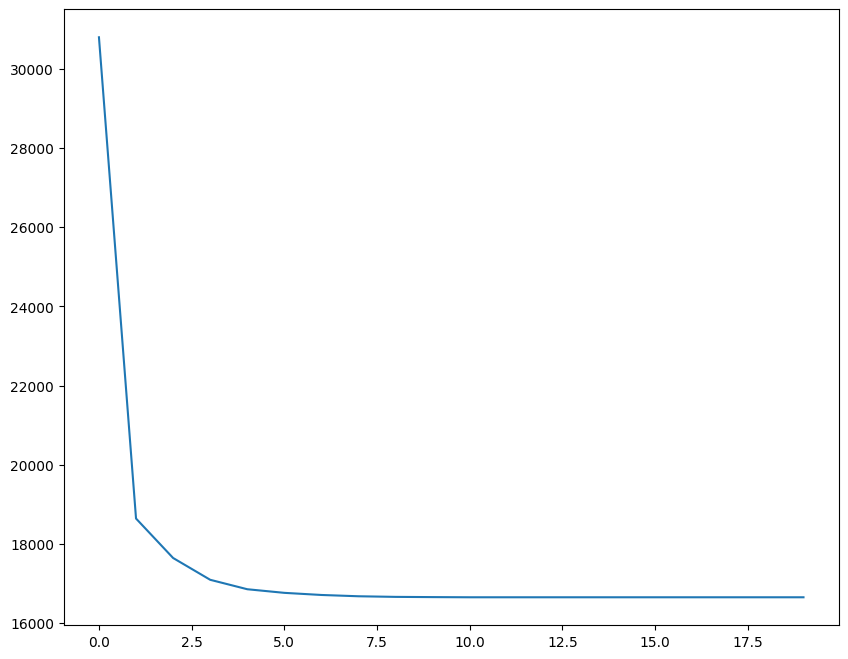

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(fo_iter_kmeans.obj)
plt.show()

Fifth iteration : 70

In [ ]:
fi_iter_ncentroids = 70
fi_iter_kmeans = faiss.Kmeans(d, fi_iter_ncentroids, niter=niter, verbose=verbose)
fi_obj_val = fi_iter_kmeans.train(img_embeddings)
obj_vals[fi_iter_ncentroids] = fi_obj_val

In [ ]:
fi_iter_kmeans.obj

array([29321.89648438, 17447.33984375, 16660.37304688, 16231.17871094,
       15951.41503906, 15790.19628906, 15713.69335938, 15647.51464844,
       15642.02246094, 15630.703125  , 15628.96191406, 15628.96191406,
       15628.96191406, 15628.96191406, 15628.96191406, 15628.96191406,
       15628.96191406, 15628.96191406, 15628.96191406, 15628.96191406])

Sixth iteration : 84

In [ ]:
si_iter_ncentroids = 84
si_iter_kmeans = faiss.Kmeans(d, si_iter_ncentroids, niter=niter, verbose=verbose)
si_obj_val = si_iter_kmeans.train(img_embeddings)
obj_vals[si_iter_ncentroids] = si_obj_val

In [ ]:
si_iter_kmeans.obj

array([27444.56835938, 16094.46191406, 15209.52832031, 14859.2265625 ,
       14763.18066406, 14729.88769531, 14720.40625   , 14720.40625   ,
       14720.40625   , 14720.40625   , 14720.40625   , 14720.40625   ,
       14720.40625   , 14720.40625   , 14720.40625   , 14720.40625   ,
       14720.40625   , 14720.40625   , 14720.40625   , 14720.40625   ])

Seventh iteration : 98

In [ ]:
se_iter_ncentroids = 98
se_iter_kmeans = faiss.Kmeans(d, se_iter_ncentroids, niter=niter, verbose=verbose)
se_obj_val = se_iter_kmeans.train(img_embeddings)
obj_vals[se_iter_ncentroids] = se_obj_val

In [ ]:
se_iter_kmeans.obj

array([25881.04296875, 15207.29980469, 14481.8515625 , 14241.54589844,
       14207.70214844, 14188.27050781, 14170.42480469, 14161.16113281,
       14155.67285156, 14150.85449219, 14145.58398438, 14145.58398438,
       14145.58398438, 14145.58398438, 14145.58398438, 14145.58398438,
       14145.58398438, 14145.58398438, 14145.58398438, 14145.58398438])

Eighth iteration : 112

In [ ]:
ei_iter_ncentroids = 112
ei_iter_kmeans = faiss.Kmeans(d, ei_iter_ncentroids, niter=niter, verbose=verbose)
ei_obj_val = ei_iter_kmeans.train(img_embeddings)
obj_vals[ei_iter_ncentroids] = ei_obj_val

In [ ]:
ei_iter_kmeans.obj

array([24976.02148438, 14632.70996094, 13807.58398438, 13521.44921875,
       13471.96289062, 13458.72265625, 13451.43457031, 13446.671875  ,
       13441.19042969, 13441.19042969, 13441.19042969, 13441.19042969,
       13441.19042969, 13441.19042969, 13441.19042969, 13441.19042969,
       13441.19042969, 13441.19042969, 13441.19042969, 13441.19042969])

Ninth iteration : 126

In [ ]:
ni_iter_ncentroids = 126
ni_iter_kmeans = faiss.Kmeans(d, ni_iter_ncentroids, niter=niter, verbose=verbose)
ni_obj_val = ni_iter_kmeans.train(img_embeddings)
obj_vals[ni_iter_ncentroids] = ni_obj_val

In [ ]:
ni_iter_kmeans.obj

array([24073.08007812, 13926.703125  , 13321.52148438, 13052.56835938,
       13011.63183594, 12996.671875  , 12996.671875  , 12996.671875  ,
       12996.671875  , 12996.671875  , 12996.671875  , 12996.671875  ,
       12996.671875  , 12996.671875  , 12996.671875  , 12996.671875  ,
       12996.671875  , 12996.671875  , 12996.671875  , 12996.671875  ])

Thenth iteration : 134

In [ ]:
te_iter_ncentroids = 134
te_iter_kmeans = faiss.Kmeans(d, te_iter_ncentroids, niter=niter, verbose=verbose)
te_obj_val = te_iter_kmeans.train(img_embeddings)
obj_vals[te_iter_ncentroids] = te_obj_val

Eleventh iteration: 162

In [ ]:
el_iter_ncentroids = 162
el_iter_kmeans = faiss.Kmeans(d, el_iter_ncentroids, niter=niter, verbose=verbose)
el_obj_val = el_iter_kmeans.train(img_embeddings)
obj_vals[el_iter_ncentroids] = el_obj_val

Twelfth iteration : 190

In [ ]:
tw_iter_ncentroids = 190
tw_iter_kmeans = faiss.Kmeans(d, tw_iter_ncentroids, niter=niter, verbose=verbose)
tw_obj_val = tw_iter_kmeans.train(img_embeddings)
obj_vals[tw_iter_ncentroids] = tw_obj_val

In [ ]:
print(obj_vals)

{7: 27321.421875, 14: 22864.064453125, 28: 19709.998046875, 56: 16656.0546875, 70: 15628.9619140625, 84: 14720.40625, 98: 14145.583984375, 112: 13441.1904296875, 126: 12996.671875, 134: 12794.25, 162: 11812.0302734375, 190: 10844.8017578125}


### Objective function value per number of centroids

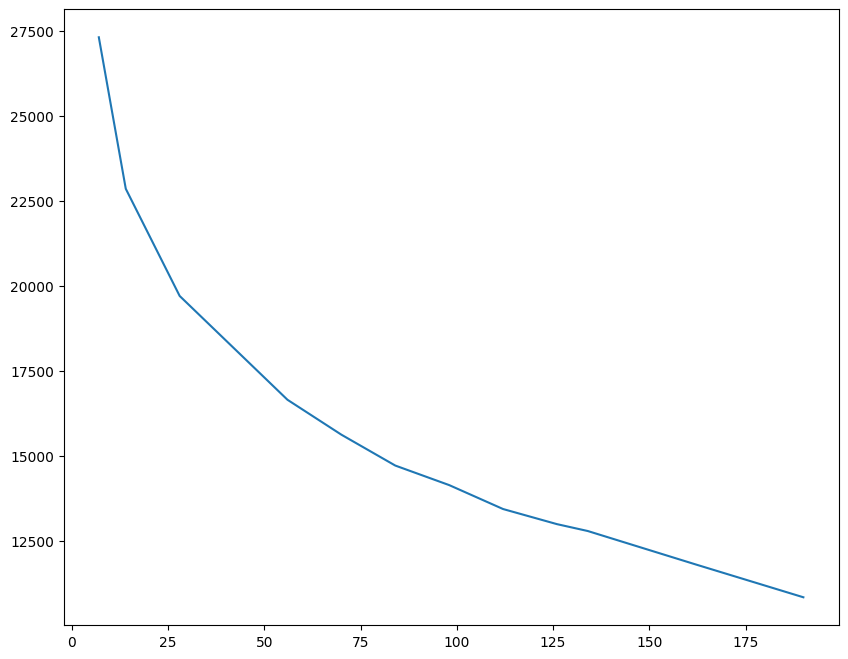

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(obj_vals.keys(), obj_vals.values())
plt.show()

In [68]:
img_array = np.array(img_embeddings).astype('float32')
D, I = fi_iter_kmeans.index.search(img_array, 1)
cluster_ids = I.reshape(-1)
unique, counts = np.unique(cluster_ids, return_counts=True)

for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} elements")


Cluster 0: 2 elements
Cluster 1: 24 elements
Cluster 2: 11 elements
Cluster 3: 12 elements
Cluster 4: 16 elements
Cluster 5: 14 elements
Cluster 6: 12 elements
Cluster 7: 4 elements
Cluster 8: 10 elements
Cluster 9: 7 elements
Cluster 10: 1 elements
Cluster 11: 3 elements
Cluster 12: 25 elements
Cluster 13: 21 elements
Cluster 14: 7 elements
Cluster 15: 15 elements
Cluster 16: 12 elements
Cluster 17: 11 elements
Cluster 18: 9 elements
Cluster 19: 4 elements
Cluster 20: 8 elements
Cluster 21: 3 elements
Cluster 22: 10 elements
Cluster 23: 5 elements
Cluster 24: 8 elements
Cluster 25: 3 elements
Cluster 26: 10 elements
Cluster 27: 14 elements
Cluster 28: 17 elements
Cluster 29: 8 elements
Cluster 30: 2 elements
Cluster 31: 4 elements
Cluster 32: 21 elements
Cluster 33: 10 elements
Cluster 34: 9 elements
Cluster 35: 5 elements
Cluster 36: 13 elements
Cluster 37: 2 elements
Cluster 38: 16 elements
Cluster 39: 13 elements
Cluster 40: 22 elements
Cluster 41: 15 elements
Cluster 42: 3 element

<BarContainer object of 70 artists>

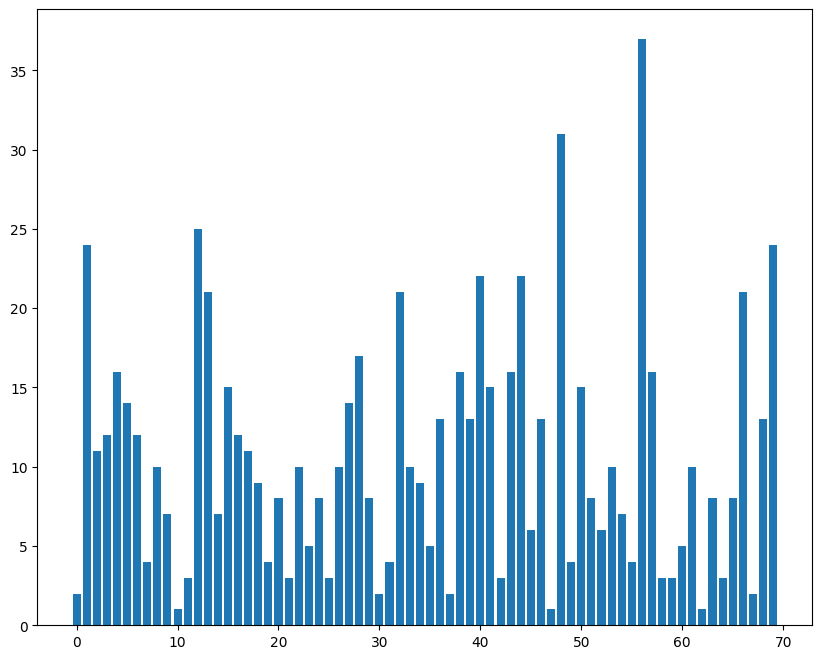

In [ ]:
plt.figure(figsize = (10,8))
plt.bar(unique, counts)

In [71]:
unique_elements, counts_elements = np.unique(counts, return_counts=True)
count_dict = dict(zip(unique_elements, counts_elements))
print(count_dict)

{1: 3, 2: 4, 3: 7, 4: 5, 5: 3, 6: 2, 7: 3, 8: 6, 9: 2, 10: 6, 11: 2, 12: 3, 13: 4, 14: 2, 15: 3, 16: 4, 17: 1, 21: 3, 22: 2, 24: 2, 25: 1, 31: 1, 37: 1}


<BarContainer object of 23 artists>

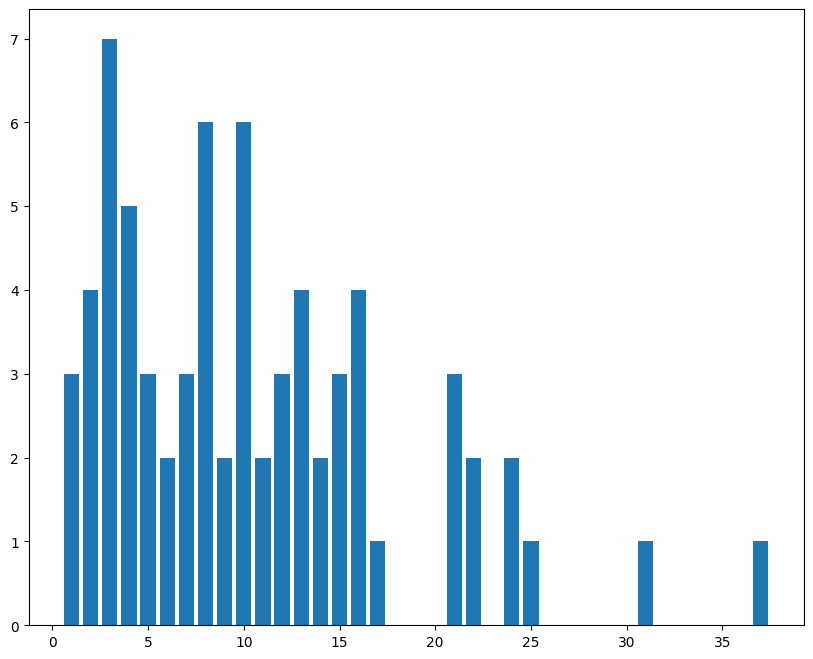

In [73]:
plt.figure(figsize = (10,8))
plt.bar(count_dict.keys(), count_dict.values())

#**Conclusion**: